<a href="https://colab.research.google.com/github/avawaxenberg/FDSfE_AWaxenberg/blob/main/HW6/kaggletrees_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary functions to run code based on Titanic passengers database 

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


Instead of kaggle json that cannot open, copy path of file and replace to run

In [53]:
ls /content/gdrive/MyDrive/kaggleTitanic/kaggle.json

/content/gdrive/MyDrive/kaggleTitanic/kaggle.json


In [54]:
!chmod 600 /content/gdrive/MyDrive/kaggleTitanic/kaggle.json

In [7]:
import json

Used the "copy path" method to upload the json file

In [24]:
envs = json.load(open("/content/gdrive/MyDrive/kaggleTitanic/kaggle.json", "r"))

In [25]:
import os

In [26]:
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [27]:
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                    2030-07-01 23:59:00  Getting Started     Prizes         69           False  
gan-getting-started                             2030-07-01 23:59:00  Getting Started     Prizes         94           False  
store-sales-time-series-forecasting             2030-06-30 23:59:00  Getting Started  Knowledge        853           False  
tpu-getting-started                             2030-06-03 23:59:00  Getting Started  Knowledge        147           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       1244           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      14125           False  


In [28]:
!mkdir kaggleTitanic

mkdir: cannot create directory ‘kaggleTitanic’: File exists


In [29]:
cd kaggleTitanic

/content/gdrive/MyDrive/kaggleTitanic/kaggleTitanic


In [30]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
ls

gender_submission.csv  kaggleTitanic/  test.csv  titanic.zip  train.csv


Used the !unzip -o method to read the file properly and run it

In [16]:
!unzip -o titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [17]:
ls

gender_submission.csv  kaggleTitanic/  titanic.zip
kaggle.json            test.csv        train.csv


In [18]:
import pandas as pd

Read the train file to begin running data about Titanic passengers

In [19]:
titanic = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [20]:
titanic.shape

(714, 12)

In [21]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Begin differentiating gender from the rest of the data into binary sexes (male = 1 [0], female = 2 [1])

In [22]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

In [32]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


Practice dropping missing values (in this case, genders that read as (N/A))

In [33]:
titanic.drop("Sex", axis=1, inplace=True)

In [34]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


Finish dropping missing values 

In [35]:
titanic.dropna(how="any", axis=0, inplace=True)

In [36]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.480874
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.501005
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000


Import sklearn model to train test split data to test accuracy with train size and random state

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic[["Pclass",	"Age",	
                                                             "gender"]], 
                                                    titanic["Survived"], 
                 train_size=0.75, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137, 3), (46, 3), (137,), (46,))

Import tree to define and run classifier; also testing accuracy with max depth and random state 

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf.score(X_train, y_train)))

accuracy on training data 0.81


In [40]:
print("accuracy on test data {:.2}".format(clf.score(X_test, y_test)))

accuracy on test data 0.76


In [41]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=3)
clf_rf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf_rf.score(X_train, y_train)))

accuracy on training data 0.8


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbd = GradientBoostingClassifier(max_depth=3, random_state=145)
clf_gbd.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf_gbd.score(X_train, y_train)))

accuracy on training data 0.93


In [43]:
print("accuracy on training data {:.2}".format(clf_gbd.score(X_test, y_test)))

accuracy on training data 0.8


Essentially, the higher the score (converted decimal to percentages), the better in accuracy (i.e., over 90%)

Now, plot the feature importances and what determines cells of importance

In [44]:
clf_rf.feature_importances_

array([0.06806021, 0.41074556, 0.52119423])

In [45]:
import numpy as np
index = np.argsort(clf_rf.feature_importances_)
np.argsort(clf_rf.feature_importances_)

array([0, 1, 2])

In [46]:
clf_rf.feature_importances_

array([0.06806021, 0.41074556, 0.52119423])

In [47]:
columns = np.array(["Pclass",	"Age",	"gender"])[index]

Now plot the figure with feature importances, based upon data derived from the classifier function used prior

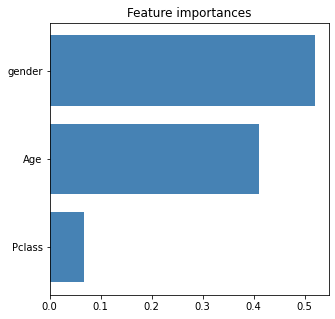

In [48]:
import pylab as plt
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.barh([0, 1, 2], clf_rf.feature_importances_[index],
        color="Steelblue", align="center")
plt.yticks(range(len(columns)), columns);
plt.show()

Using uncertainty with feature importances

In [49]:
importances = [tree.feature_importances_ for tree in clf_rf.estimators_]
len(clf_rf.estimators_), len(importances)

(100, 100)

In [50]:
np.array(importances).mean(axis=0),  clf_rf.feature_importances_

(array([0.06806021, 0.41074556, 0.52119423]),
 array([0.06806021, 0.41074556, 0.52119423]))

In [51]:
np.array(importances).std(axis=0)

array([0.06921867, 0.24586732, 0.25339627])

The lines in the graphs display the uncertainity of feature importances, displaying more accurate data

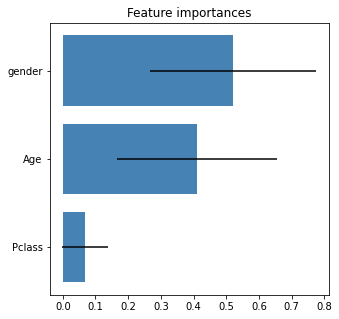

In [52]:
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.barh([0, 1, 2], clf_rf.feature_importances_[index],
         xerr=np.array(importances).std(axis=0),
        color="Steelblue", align="center")
plt.yticks(range(len(columns)), columns);
plt.show()